### Setup

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### EDA

In [ ]:
books = pd.read_csv('/content/drive/Shareddrives/CMPE260/data/Books.csv')
ratings = pd.read_csv('/content/drive/Shareddrives/CMPE260/data/Ratings.csv')
users = pd.read_csv('/content/drive/Shareddrives/CMPE260/data/Users.csv')
final_users = pd.read_csv('/content/drive/Shareddrives/CMPE260/data/final_user_ids.csv', index_col=0)

<ipython-input-3-3c22844d58d8>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/Shareddrives/CMPE260/data/Books.csv')


In [ ]:
books.info(), ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), obje

(None, None)

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_1 = ratings.groupby(['User-ID'])[['Book-Rating']].count().sort_values(by=['Book-Rating'], ascending=False)
ratings_1

,Book-Rating
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
118579,1
118576,1
118574,1


In [ ]:
ratings_2 = ratings.groupby(['ISBN'])[['Book-Rating']].count().sort_values(by=['Book-Rating'], ascending=False)
ratings_2.describe()

,Book-Rating
count,340556.000000
mean,3.376185
std,12.436252
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2502.000000


75% of the books have received 2 or lesser ratings

In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


(array([716109.,   1770.,   2759.,   5996.,   8904.,  50974.,  36924.,
         76457., 103736., 146151.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

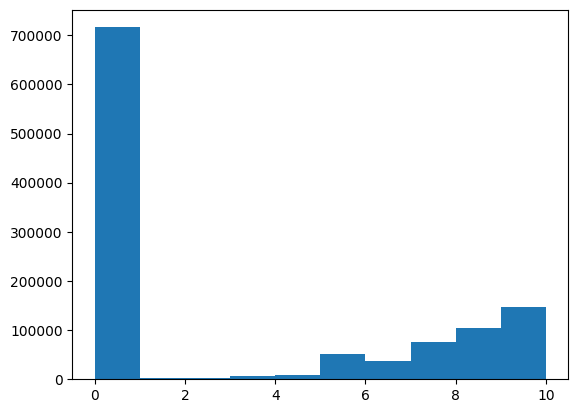

In [ ]:
plt.hist(ratings['Book-Rating'])

In [ ]:
ratings_wt_implicit_ratings = ratings[ratings['Book-Rating'] != 0]
ratings.shape, ratings_wt_implicit_ratings.shape

((1149780, 3), (433671, 3))

For now, we will eliminate implicit feedback. This leads to reduction in dataste size.

In [ ]:
ratings['User-ID'].nunique()

105283

0.2 million books, rated by 0.1 million readers with multiple ratings per book and mutiple ratings per user.

In [ ]:
# only use users that are in the final user list
filtered_users = users[users['User-ID'].isin(final_users['final_user_id'].values)]

In [ ]:
# clean the location column
filtered_users[['city', 'state', 'country']] = filtered_users['Location'].str.split(',', n=2, expand=True)
for col in ['city', 'state', 'country']:
  filtered_users[col] = filtered_users[col].str.strip()

In [ ]:
# fillna using groupby
filtered_users['Age'] = filtered_users.groupby(['country'])['Age'].transform(lambda x: x.fillna(x.mean()))

malaysia_mean_age = filtered_users[filtered_users['country'] == 'malaysia']['Age'].mean()
filtered_users.loc[filtered_users['country'] == 'singapore', 'Age'] = malaysia_mean_age

In [ ]:
user_features = filtered_users.rename(columns={'User-ID':'user_id', 'Age':'age'})

### Data Prep

In [ ]:
books = books.iloc[:, :3]

In [ ]:
books.columns, ratings.columns

(Index(['ISBN', 'Book-Title', 'Book-Author'], dtype='object'),
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object'))

In [ ]:
df = books.join(ratings.set_index('ISBN'), how='left', on=['ISBN'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032345 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ISBN         1032345 non-null  object 
 1   Book-Title   1032345 non-null  object 
 2   Book-Author  1032344 non-null  object 
 3   User-ID      1031136 non-null  float64
 4   Book-Rating  1031136 non-null  float64
dtypes: float64(2), object(3)
memory usage: 47.3+ MB


In [ ]:
df = df.dropna(subset=['User-ID'])

In [ ]:
df = df[df['ISBN'].str.isnumeric()]
df['ISBN'] = df['ISBN'].astype(int)
df['User-ID'] = df['User-ID'].astype(int)

In [ ]:
# remove implicit feedback
df = df[df['Book-Rating']>0]

In [ ]:
df = df.rename(columns={'ISBN':'isbn', 'Book-Title':'title', 'Book-Author':'author', 'User-ID':'user_id', 'Book-Rating':'rating'})

In [ ]:
# Create dummy boolean column which represents whether a book is a Best seller or not
best_seller = pd.DataFrame(columns=['isbn', 'best_seller'])
best_seller['isbn'] = df.isbn.unique()
best_seller['best_seller'] = random.choices([True, False], weights=[5, 5], k=df.isbn.nunique())

In [ ]:
final_df = df.join(best_seller.set_index('isbn'), how='left', on=['isbn'])

In [ ]:
final_df.head()

,isbn,title,author,user_id,rating,best_seller
1,2005018,Clara Callan,Richard Bruce Wright,8,5.0,True
1,2005018,Clara Callan,Richard Bruce Wright,11676,8.0,True
1,2005018,Clara Callan,Richard Bruce Wright,67544,8.0,True
1,2005018,Clara Callan,Richard Bruce Wright,116866,9.0,True
1,2005018,Clara Callan,Richard Bruce Wright,123629,9.0,True


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352196 entries, 1 to 271356
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   isbn         352196 non-null  int64  
 1   title        352196 non-null  object 
 2   author       352195 non-null  object 
 3   user_id      352196 non-null  int64  
 4   rating       352196 non-null  float64
 5   best_seller  352196 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 16.5+ MB


In [ ]:
final_df.to_csv('/content/drive/Shareddrives/CMPE260/data/df.csv', index=False)

In [ ]:
user_features.to_csv('/content/drive/Shareddrives/CMPE260/data/User_features.csv')